1. Importing Required Libraries

We import the necessary Python libraries for data manipulation, visualization, and machine learning

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

2. Loading Female Data

We read the female anthropometric dataset using pandas.read_csv and display the first 5 rows.

In [62]:
female_data = pd.read_csv("ANSUR_II_FEMALE_Public.csv")
female_data.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


3. Loading Male Data

We read the male anthropometric dataset. Note that encoding="latin-1" is used to correctly handle special characters.

In [63]:
male_data = pd.read_csv("ANSUR_II_MALE_Public.csv", encoding="latin-1")
male_data.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


4. Concatenating Male and Female Data

We merge the female and male datasets into a single data dataframe.

In [64]:
data = pd.concat([female_data, male_data])
data

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,subjectid
0,10037.0,231,1282,301,204,1180,222,177,373,315,...,92Y,Germany,2,NaN,2,26,61,142,Right hand,NaN
1,10038.0,194,1379,320,207,1292,225,178,372,272,...,25U,California,3,Mexican,3,21,64,120,Right hand,NaN
2,10042.0,183,1369,329,233,1271,237,196,397,300,...,35D,Texas,1,NaN,1,23,68,147,Right hand,NaN
3,10043.0,261,1356,306,214,1250,240,188,384,364,...,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand,NaN
4,10051.0,309,1303,308,214,1210,217,182,378,320,...,42A,Texas,1,NaN,1,45,63,195,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,NaN,235,1353,312,216,1263,228,193,384,318,...,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand,29442.0
4078,NaN,247,1473,336,234,1346,253,196,428,374,...,91B,Oklahoma,1,NaN,1,22,71,194,Right hand,29443.0
4079,NaN,264,1394,313,227,1280,245,193,407,367,...,13B,Oklahoma,1,NaN,1,23,67,186,Right hand,29447.0
4080,NaN,203,1417,327,223,1314,250,196,419,365,...,13P,Oklahoma,1,NaN,1,22,69,165,Right hand,29451.0


5. Unit Conversion and Gender Encoding

We convert weight and height units to kg and cm, and encode gender numerically (Female = 0, Male = 1).

In [65]:
data["weightkg"] = data["weightkg"] / 10 #convert to kg
data["stature"] = data["stature"] / 10   #convert to cm
data["Gender"] = data["Gender"].replace(["Female", "Male"], [0,1])

male_data["weightkg"] = male_data["weightkg"] / 10 #convert to kg
male_data["stature"] = male_data["stature"] / 10   #convert to cm
female_data["weightkg"] = female_data["weightkg"] / 10 #convert to kg
female_data["stature"] = female_data["stature"] / 10   #convert to cm

C:\Users\Faezeh\AppData\Local\Temp\ipykernel_8780\3885077251.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Gender"] = data["Gender"].replace(["Female", "Male"], [0,1])


6. Visualizing Male & Female Distribution

We create a scatter plot to visualize height vs weight for males and females.

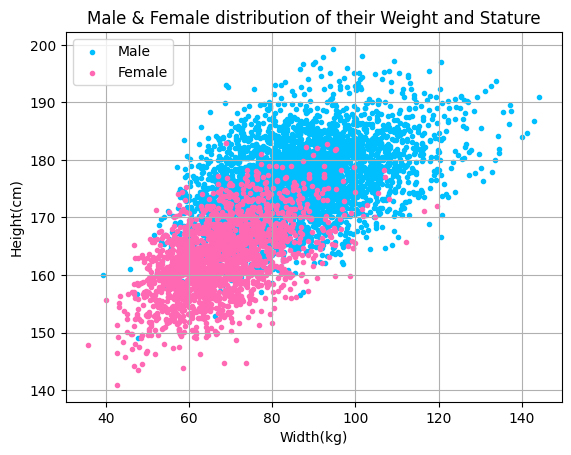

In [66]:
plt.scatter(male_data["weightkg"], male_data["stature"],label = "Male", color = "deepskyblue", marker = ".")
plt.scatter(female_data["weightkg"], female_data["stature"], label = "Female", color = "hotpink", marker = ".")
plt.title("Male & Female distribution of their Weight and Stature")
plt.xlabel("Width(kg)")
plt.ylabel("Height(cm)")
plt.legend()
plt.grid()
plt.show()

7. Preparing Features (X) and Labels (Y)

We select weight and height as features, and gender as the label.

In [67]:
X = data[["weightkg", "stature"]]
X

,weightkg,stature
0,65.7,156.0
1,53.4,166.5
2,66.3,171.1
3,78.2,166.0
4,88.6,157.2
...,...,...
4077,67.5,168.8
4078,89.6,176.5
4079,83.2,169.0
4080,73.1,171.8


In [68]:
Y = data["Gender"]
Y

0       0
1       0
2       0
3       0
4       0
       ..
4077    1
4078    1
4079    1
4080    1
4081    1
Name: Gender, Length: 6068, dtype: int64

8. Splitting Data into Training and Testing Sets

We split the dataset into 80% training and 20% testing using train_test_split.

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Training label shape:", Y_train.shape)
print("Testing set shape:", X_test.shape)
print("Testing label shape:", Y_test.shape)

Training set shape: (4854, 2)
Training label shape: (4854,)
Testing set shape: (1214, 2)
Testing label shape: (1214,)


9. Object-Oriented KNN Algorithm

We use a custom KNN class to fit and predict gender.

In [70]:
from knn import KNN

K = 3

In [71]:
knn = KNN(k=3)
knn.fit(X_train.values, Y_train.values)

In [73]:
test = knn.predict(X_test.values)

In [ ]:
for x in test:
    if x == 0:
        print("👩‍🦰")
    else:
        print("👨‍🦱")

👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👩‍🦰
👩‍🦰
👨‍🦱
👨‍🦱
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👩‍🦰
👨‍🦱
👨‍🦱
👩‍🦰
👨‍🦱
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👩‍🦰
👨‍🦱
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👩‍🦰
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👨‍🦱
👩‍🦰
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👨‍🦱
👩‍🦰
👨‍🦱
👩‍🦰
👨‍🦱
👨‍🦱
👩‍🦰
👨‍🦱
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👩‍🦰
👨‍🦱
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👨‍🦱
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👩‍🦰
👨‍🦱
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👨‍🦱
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👨‍🦱
👩‍🦰
👨‍🦱
👨‍🦱
👩‍🦰
👨‍🦱
👨‍🦱
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👩‍🦰
👨‍🦱
👨‍🦱
👩‍🦰
👨‍🦱
👩‍🦰
👩‍🦰
👩‍🦰
👩‍🦰
👨‍🦱
👨‍🦱
👩‍🦰
👩‍🦰
👩‍🦰
👨‍🦱
👨‍🦱
👩‍🦰
👨‍🦱
👨‍🦱
👩‍🦰
👨‍🦱
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👨‍🦱
👩‍🦰
👨‍🦱
👩‍🦰
👩‍🦰
👩‍🦰
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👨‍🦱
👩‍🦰
👨‍🦱


10. Custom KNN Evaluation

In this section, we evaluate our custom KNN implementation using the test dataset.

In [ ]:
knn.evaluate(X_test.values, Y_test.values)

0.8253706754530478

10. Confusion Matrix  

We calculate the confusion matrix manually to see how well our predictions match the true labels

In [ ]:
confusion_matrix = np.zeros((2,2))

for i in range (len(Y_test)):
    if Y_test.values[i] == 0 and test[i] == 0:
        confusion_matrix[0][0] += 1
    elif Y_test.values[i] == 0 and test[i] == 1:
        confusion_matrix[0][1] += 1
    elif Y_test.values[i] == 1 and test[i] == 0:
        confusion_matrix[1][0] += 1
    elif Y_test.values[i] == 1 and test[i] == 1:
        confusion_matrix[1][1] += 1

confusion_matrix

array([[302., 124.],
       [ 88., 700.]])

We can visualize the confusion matrix with a heatmap.

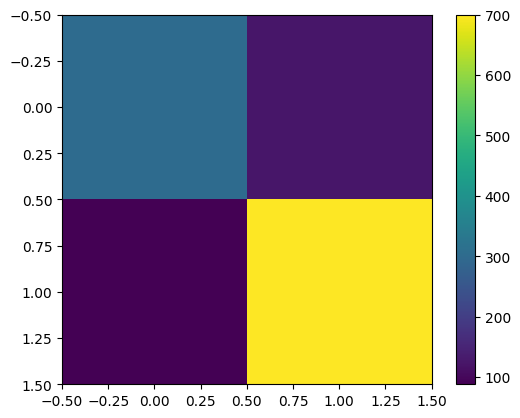

In [ ]:
plt.imshow(confusion_matrix)
plt.colorbar()
plt.show()

Custom KNN with k=5

Now we change k=5 and repeat the process.

In [ ]:
knn = KNN(k=5)
knn.fit(X_train.values, Y_train.values)

In [ ]:
test = knn.predict(X_test.values)

In [ ]:
knn.evaluate(X_test.values, Y_test.values)

0.8352553542009885

In [ ]:
confusion_matrix = np.zeros((2,2))

for i in range (len(Y_test)):
    if Y_test.values[i] == 0 and test[i] == 0:
        confusion_matrix[0][0] += 1
    elif Y_test.values[i] == 0 and test[i] == 1:
        confusion_matrix[0][1] += 1
    elif Y_test.values[i] == 1 and test[i] == 0:
        confusion_matrix[1][0] += 1
    elif Y_test.values[i] == 1 and test[i] == 1:
        confusion_matrix[1][1] += 1

confusion_matrix

array([[305., 121.],
       [ 79., 709.]])

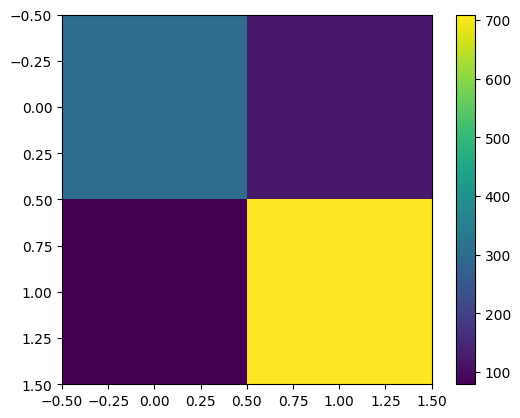

In [ ]:
plt.imshow(confusion_matrix)
plt.colorbar()
plt.show()

Custom KNN with k=7

Now we change k=7 and repeat the process

In [ ]:
knn = KNN(k=7)
knn.fit(X_train.values, Y_train.values)

In [ ]:
test = knn.predict(X_test.values)

In [ ]:
knn.evaluate(X_test.values, Y_test.values)

0.8327841845140033

In [ ]:
confusion_matrix = np.zeros((2,2))

for i in range (len(Y_test)):
    if Y_test.values[i] == 0 and test[i] == 0:
        confusion_matrix[0][0] += 1
    elif Y_test.values[i] == 0 and test[i] == 1:
        confusion_matrix[0][1] += 1
    elif Y_test.values[i] == 1 and test[i] == 0:
        confusion_matrix[1][0] += 1
    elif Y_test.values[i] == 1 and test[i] == 1:
        confusion_matrix[1][1] += 1

confusion_matrix

array([[304., 122.],
       [ 81., 707.]])

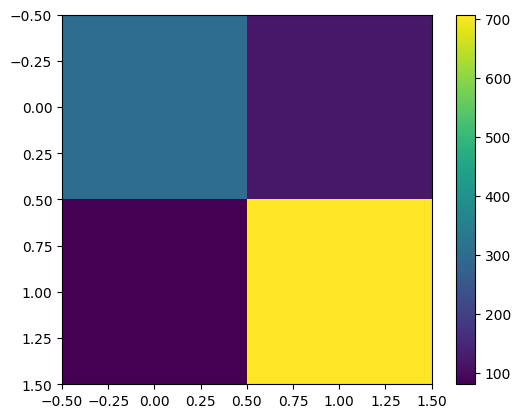

In [ ]:
plt.imshow(confusion_matrix)
plt.colorbar()
plt.show()

scikit-learn KNN Implementation

Now we use scikit-learn's KNN for comparison.

KNN with k=3

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train.values, Y_train.values)
final = knn.predict(X_test.values)

In [ ]:
accuracy = knn.score(X_test, Y_test)
accuracy

c:\Users\Faezeh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.8253706754530478

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(Y_test, final)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[302 124]
 [ 88 700]]


KNN with k=5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train.values, Y_train.values)
final = knn.predict(X_test.values)

In [ ]:
accuracy = knn.score(X_test, Y_test)
accuracy

c:\Users\Faezeh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.8360790774299836

In [ ]:
cm = confusion_matrix(Y_test, final)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[306 120]
 [ 79 709]]


KNN with k=7

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.fit(X_train.values, Y_train.values)
final = knn.predict(X_test.values)

In [ ]:
accuracy = knn.score(X_test, Y_test)
accuracy

c:\Users\Faezeh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.8319604612850082

In [ ]:
cm = confusion_matrix(Y_test, final)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[303 123]
 [ 81 707]]
